<center>
    <h1>Anime Data Analysis Project</h1>
</center>



---



The global anime industry has experienced massive growth in the last two decades, with thousands of shows being released across a wide range of genres and formats. This dataset provides an opportunity to explore trends in anime production, popularity, and viewer preferences.

The analysis focuses on key aspects such as viewer ratings, popularity, episode counts, airing schedules, and genre distributions. Using Python for data cleaning and exploration, and Tableau for dashboard visualization, this project transforms raw anime data into meaningful insights.

By the end of this analysis, we aim to answer questions such as:

- What genres are most common in anime?
- Which studios consistently produce top-rated content?
- How do viewer ratings correlate with popularity?
- How has anime production evolved over the years?

This notebook is structured to first clean and prepare the data, then perform exploratory visual analysis, and finally export the dataset for interactive visualization in Tableau.


### Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [108]:
df_orignal = pd.read_csv("anime-dataset-2023.csv")

In [109]:
df=pd.read_csv("anime-dataset-2023.csv")
df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


### Insprcting The Data

In [111]:
print("Shape:", df.shape)

Shape: (24905, 24)


In [112]:
df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')

### Checking Missing Values

In [114]:
df.isnull().sum()

anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Synopsis        0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Producers       0
Licensors       0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
Image URL       0
dtype: int64

### Removing Unnecessory Columns

In [116]:
df = df.drop(columns=["Image URL", "Synopsis", "Licensors", "Other name"])

In [117]:
df.columns

Index(['anime_id', 'Name', 'English name', 'Score', 'Genres', 'Type',
       'Episodes', 'Aired', 'Premiered', 'Status', 'Producers', 'Studios',
       'Source', 'Duration', 'Rating', 'Rank', 'Popularity', 'Favorites',
       'Scored By', 'Members'],
      dtype='object')

In [118]:
df.describe(include='all')

,anime_id,Name,English name,Score,Genres,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
count,24905.000000,24905,24905,24905,24905,24905,24905,24905,24905,24905,24905,24905,24905,24905,24905,24905,24905.000000,24905.000000,24905,2.490500e+04
unique,NaN,24901,10134,567,1006,7,252,15213,244,3,4423,1547,17,331,7,15198,NaN,NaN,8281,NaN
top,NaN,Azur Lane,UNKNOWN,UNKNOWN,UNKNOWN,TV,1.0,Not available,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Original,24 min per ep,PG-13 - Teens 13 or older,UNKNOWN,NaN,NaN,UNKNOWN,NaN
freq,NaN,2,14577,9213,4929,7597,11532,915,19399,24070,13350,10526,9622,1961,8502,4612,NaN,NaN,9213,NaN
mean,29776.709014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12265.388356,432.595222,NaN,3.710496e+04
std,17976.076290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7187.428393,4353.181647,NaN,1.568252e+05
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000e+00
25%,10507.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040.000000,0.000000,NaN,2.090000e+02
50%,34628.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12265.000000,1.000000,NaN,1.056000e+03
75%,45240.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18491.000000,18.000000,NaN,9.326000e+03


In [119]:
df.dtypes

anime_id         int64
Name            object
English name    object
Score           object
Genres          object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
dtype: object

### Fixing Data Types

In [121]:
df["Score"] = pd.to_numeric(df["Score"], errors='coerce')
df["Episodes"] = pd.to_numeric(df["Episodes"], errors='coerce')
df["Rank"] = pd.to_numeric(df["Rank"], errors='coerce')
df["Scored By"] = pd.to_numeric(df["Scored By"].str.replace(',', ''), errors='coerce')

### Fixing Date Columns

In [123]:
df["Aired_From"] = df["Aired"].str.split("to").str[0].str.strip()
df["Aired_To"] = df["Aired"].str.split("to").str[1].str.strip()

df["Aired_From"] = pd.to_datetime(df["Aired_From"], errors='coerce')
df["Aired_To"] = pd.to_datetime(df["Aired_To"], errors='coerce')


In [124]:
df.dtypes

anime_id                 int64
Name                    object
English name            object
Score                  float64
Genres                  object
Type                    object
Episodes               float64
Aired                   object
Premiered               object
Status                  object
Producers               object
Studios                 object
Source                  object
Duration                object
Rating                  object
Rank                   float64
Popularity               int64
Favorites                int64
Scored By              float64
Members                  int64
Aired_From      datetime64[ns]
Aired_To        datetime64[ns]
dtype: object

**Checking Duplicates**

In [126]:
df.duplicated().sum()

0

**Split Genres into a list**

In [128]:
df["Genre_List"] = df["Genres"].str.split(", ")
df.head()

,anime_id,Name,English name,Score,Genres,Type,Episodes,Aired,Premiered,Status,...,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Aired_From,Aired_To,Genre_List
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,...,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,1998-04-03,1999-04-24,"[Action, Award Winning, Sci-Fi]"
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,...,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,2001-09-01,NaT,"[Action, Sci-Fi]"
2,6,Trigun,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,...,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,1998-04-01,1998-09-30,"[Action, Adventure, Sci-Fi]"
3,7,Witch Hunter Robin,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,...,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,2002-07-03,2002-12-25,"[Action, Drama, Mystery, Supernatural]"
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,...,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,2004-09-30,2005-09-29,"[Adventure, Fantasy, Supernatural]"


### Basic Summary

In [130]:
df.describe()

,anime_id,Score,Episodes,Rank,Popularity,Favorites,Scored By,Members,Aired_From,Aired_To
count,24905.000000,15692.000000,24294.000000,20293.000000,24905.000000,24905.000000,1.569200e+04,2.490500e+04,20090,9337
mean,29776.709014,6.380890,14.913518,9960.770167,12265.388356,432.595222,2.997438e+04,3.710496e+04,2009-07-01 05:27:16.754604032,2010-01-18 00:33:09.504123392
min,1.000000,1.850000,1.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000e+00,1917-04-28 00:00:00,1962-02-25 00:00:00
25%,10507.000000,5.730000,1.000000,4885.000000,6040.000000,0.000000,3.840000e+02,2.090000e+02,2004-03-15 12:00:00,2004-07-09 00:00:00
50%,34628.000000,6.390000,2.000000,9958.000000,12265.000000,1.000000,1.760000e+03,1.056000e+03,2013-07-12 00:00:00,2013-05-29 00:00:00
75%,45240.000000,7.060000,13.000000,15032.000000,18491.000000,18.000000,1.085550e+04,9.326000e+03,2018-07-14 00:00:00,2018-07-17 00:00:00
max,55735.000000,9.100000,3057.000000,20104.000000,24723.000000,217606.000000,2.660903e+06,3.744541e+06,2023-12-22 00:00:00,2023-11-24 00:00:00
std,17976.076290,0.928696,48.581251,5856.990951,7187.428393,4353.181647,1.169348e+05,1.568252e+05,NaN,NaN


# Exploratory Data Analysis

### Top 20 Anime By Score

In [133]:
top_anime = df.sort_values(by="Score", ascending=False).head(20)
top_anime[["Name", "Score", "Members", "Favorites"]]

,Name,Score,Members,Favorites
3961,Fullmetal Alchemist: Brotherhood,9.10,3176556,217606
16617,Bleach: Sennen Kessen-hen,9.07,445198,17999
5667,Steins;Gate,9.07,2440369,182964
9880,Gintama°,9.06,595767,15947
22348,Shingeki no Kyojin: The Final Season - Kankets...,9.05,435672,9078
14865,Shingeki no Kyojin Season 3 Part 2,9.05,2104016,55245
17572,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.05,820642,29118
6456,Hunter x Hunter (2011),9.04,2656870,200265
5989,Gintama',9.04,525688,7765
15525,Gintama: The Final,9.04,132955,4051


This table displays the top 20 highest-rated anime series in the dataset, ranked by their overall viewer scores. In addition to the score, the table also shows the total number of members (viewers who have interacted with the show) and how many users have marked the anime as a favorite.

Several notable titles appear on this list, such as **Fullmetal Alchemist: Brotherhood**, **Steins;Gate**, and **Attack on Titan: The Final Season**. Interestingly, multiple entries from the **Gintama** series are featured, indicating its strong fanbase and consistent quality over time.

This list highlights the shows that are not only critically acclaimed but also widely followed and favored within the anime community.


### Checking The Most Common Genres

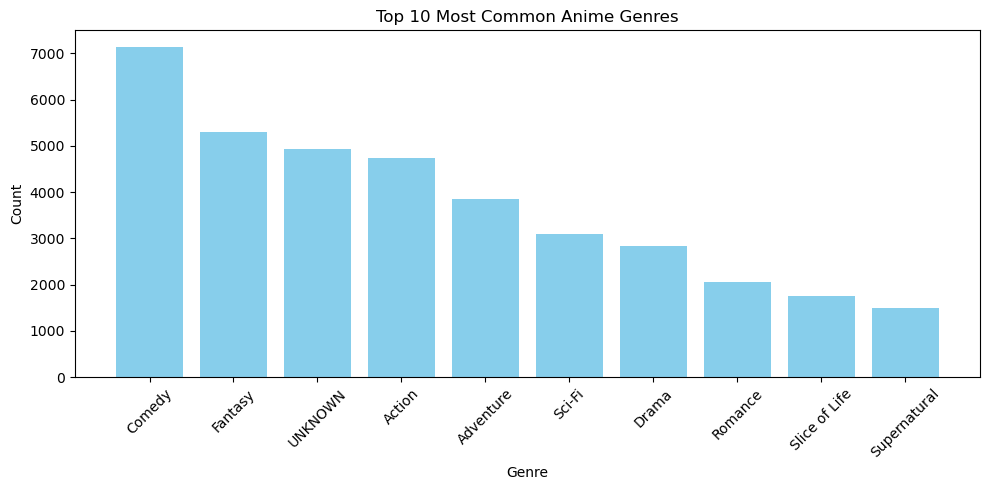

In [136]:
from collections import Counter
import matplotlib.pyplot as plt

all_genres = df["Genre_List"].dropna().explode()
genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(10, 5))
plt.bar(genres, counts, color='skyblue')
plt.title("Top 10 Most Common Anime Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Anime Production Trend Over the Years

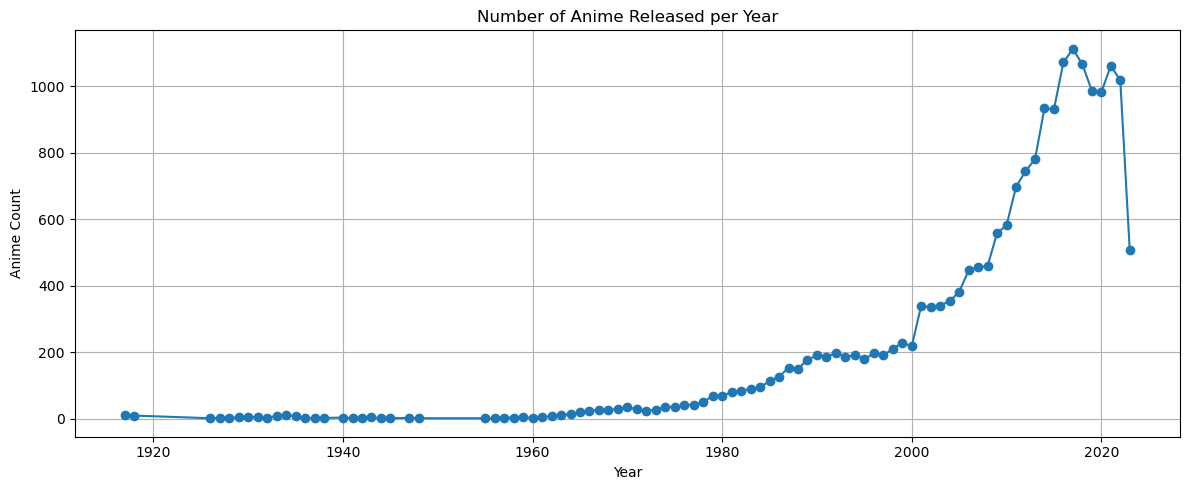

In [138]:
df["Year"] = df["Aired_From"].dt.year
year_counts = df["Year"].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title("Number of Anime Released per Year")
plt.xlabel("Year")
plt.ylabel("Anime Count")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**
- Anime production remained relatively low until the 1980s.
- A significant upward trend started in the mid-1990s, with a sharp rise after 2000.
- The number of releases peaked around 2018–2019, crossing 1000 anime in a single year.
- A noticeable dip can be seen in the most recent years, likely due to incomplete data or disruptions caused by global events such as the COVID-19 pandemc.


### Score vs. Popularity

This scatter plot compares anime viewer scores with popularity rankings. Each dot represents one anime title. The x-axis shows the user rating score, while the y-axis shows the popularity rank (lower rank means more popular).

Popularity is typically influenced by how many users have interacted with or watched a show, while score reflects how well those users rated it. This visualization helps explore whether highly-rated shows are also widely popular — or if niche titles can score well without broad attention.


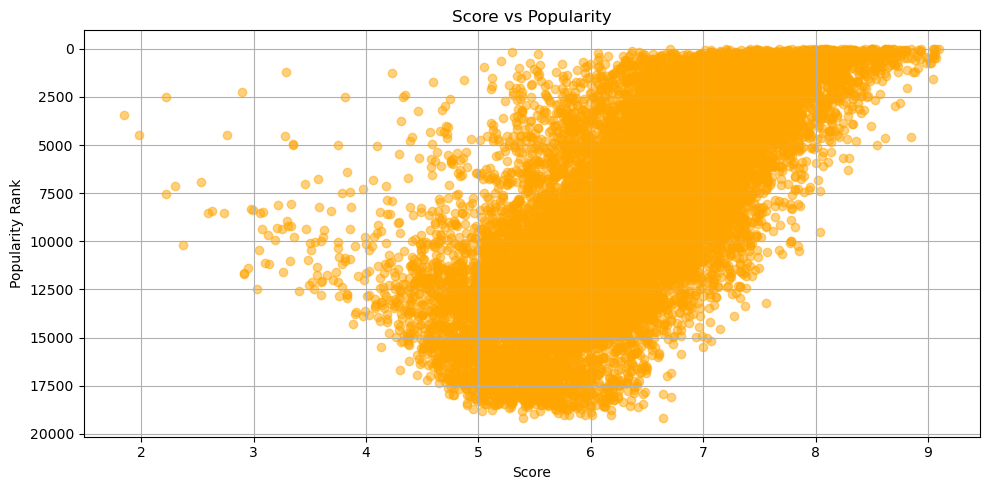

In [141]:
plt.figure(figsize=(10,5))
plt.scatter(df["Score"], df["Popularity"], alpha=0.5, color='orange')
plt.xlabel("Score")
plt.ylabel("Popularity Rank")
plt.title("Score vs Popularity")
plt.gca().invert_yaxis()  # Lower rank = more popular
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Observations**

- Highly popular anime (top-left region) tend to have scores between 7 and 9.
- There is a visible concentration of anime around score 6 to 8 and popularity ranks beyond 10,000, suggesting many titles are mid-rated and less popular.
- Some highly-rated anime (score > 8.5) are not highly ranked in popularity, indicating that good quality does not always correlate with mass popularity.
- A broad spread in the lower score range shows that low-rated anime can still vary in popularity.

Overall, while there is some relationship between score and popularity, it is not strictly linear — external factors like marketing, genre, or nostalgia may influence popularity independent of quality.


### Top 10 Most Favorited Anime 

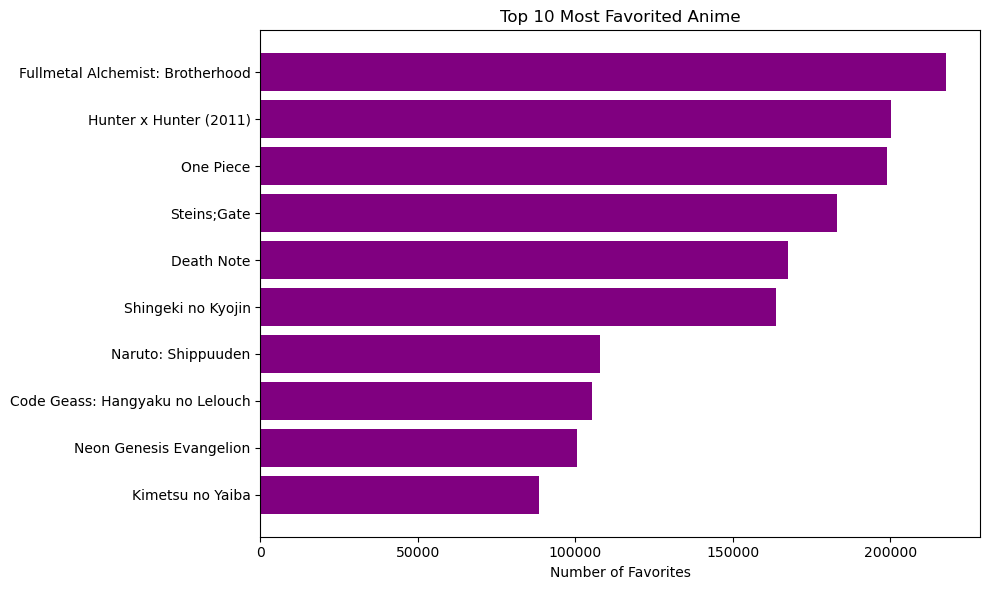

In [144]:
top_fav = df.sort_values(by="Favorites", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_fav["Name"], top_fav["Favorites"], color="purple")
plt.xlabel("Number of Favorites")
plt.title("Top 10 Most Favorited Anime")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Key Observations**

- *Fullmetal Alchemist: Brotherhood* tops the list with over 200,000 favorites, confirming its consistent position as a fan-favorite in the anime community.
- Long-running series like *Hunter x Hunter*, *One Piece*, and *Naruto: Shippuuden* appear prominently, indicating that extended character development and plot arcs often result in stronger fan attachment.
- Critically acclaimed and shorter series like *Steins;Gate* and *Death Note* also rank high, showing that quality and narrative depth can rival popularity in terms of fan appreciation.
- Titles such as *Kimetsu no Yaiba* and *Code Geass* reflect more recent or genre-specific favorites that have built passionate followings in a shorter time.

Overall, the chart reflects a strong correlation between cultural impact and user engagement through favoriting behavior.


### Seasonal Analysis

In [147]:
df["Season"] = df["Premiered"].astype(str).str.extract(r'^(spring|summer|fall|winter)', expand=False)
df["Season"] = df["Season"].str.capitalize()

In [148]:
df["Season"].value_counts()

Season
Spring    1789
Fall      1601
Winter    1128
Summer     988
Name: count, dtype: int64

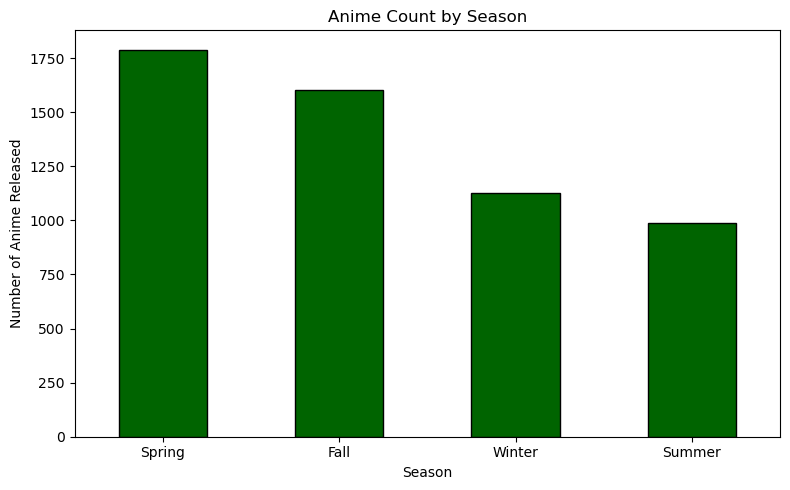

In [149]:
season_counts = df["Season"].value_counts()

plt.figure(figsize=(8, 5))
season_counts.plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title("Anime Count by Season")
plt.xlabel("Season")
plt.ylabel("Number of Anime Released")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observations**
- The Spring season has the highest number of anime releases, making it the most popular release window.

- Fall follows closely, indicating that both Spring and Fall are considered strong seasons for launching new shows.

- Winter sees a moderate number of releases, potentially due to fewer seasonal events or budget cycles.

- Summer consistently has the lowest number of releases, which could be due to factors like viewer availability, production breaks, or competitive timing.

This trend may help studios align future releases with seasons that historically attract more viewership and attention. 

### Top-Rated Anime Genres Based on Average Scores

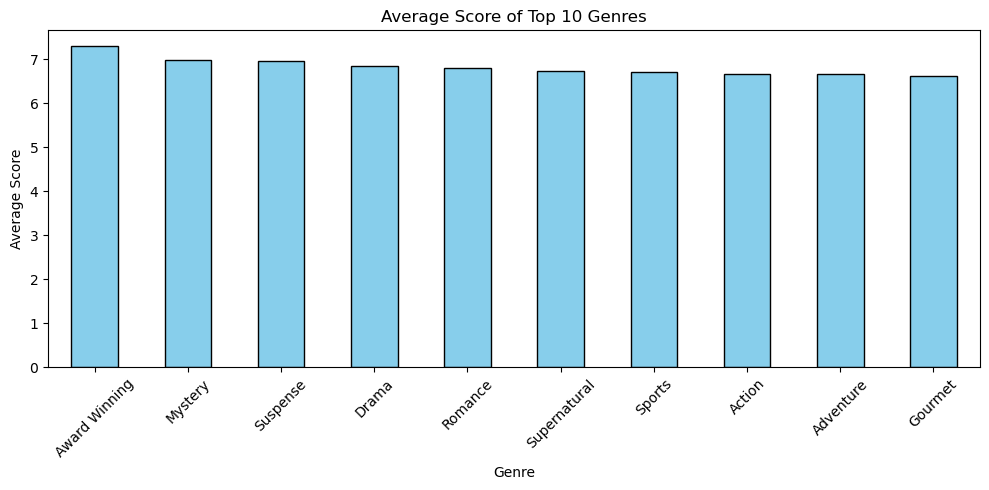

In [152]:
df_exploded = df.explode("Genre_List")
genre_score = df_exploded.groupby("Genre_List")["Score"].mean().dropna()

# Get top 10 genres by average score
top_genres = genre_score.sort_values(ascending=False).head(10)
top_genre_score = genre_score[top_genres.index]

# Plotting
plt.figure(figsize=(10,5))
top_genre_score.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Score of Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations: Average Score of Top 10 Anime Genres**

1. **Award Winning** anime lead with the highest average score, indicating that critically acclaimed shows tend to resonate well with audiences.
2. **Mystery** and **Suspense** genres also score high, suggesting that story-driven and intellectually engaging anime are well-received.
3. **Drama** and **Romance** continue their trend of popularity by maintaining consistently strong average scores.
4. Genres like **Supernatural**, **Sports**, and **Action** show solid performance, balancing excitement and emotional arcs.
5. Interestingly, **Gourmet** anime made it to the top 10, hinting at niche interest groups appreciating well-executed culinary storytelling.
6. All genres shown have average scores clustered between **6.8 to 7.3**, reflecting that genre alone doesn’t drastically affect quality, but some genres edge ahead due to execution.

### Distribution of Anime Content Types

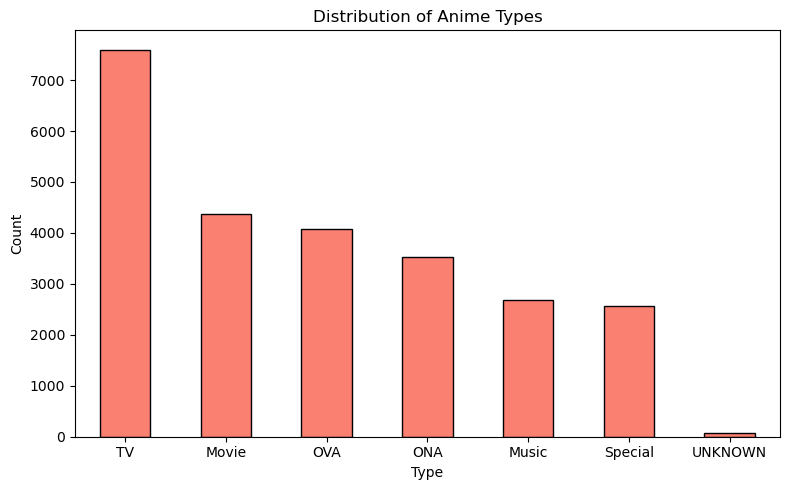

In [155]:
type_counts = df["Type"].value_counts().head(10)

plt.figure(figsize=(8,5))
type_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Distribution of Anime Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This chart shows how anime titles are distributed across different types. It is evident that TV anime dominate the dataset, followed by Movies, OVAs, and ONAs. Less frequent types include Music videos, Specials, and a few with unknown classification.

**Conclusion**

TV is the most common format for anime, making it the primary medium for content delivery, while other types are significantly fewer in number.

<center>
    <h1>Final Conclusion & Key Insights</h1>
</center>

---
This exploratory data analysis offered valuable insights into the anime industry based on user ratings, popularity metrics, genres, and content types.

- **TV remains the dominant format**, followed by movies and OVAs, showing how studios primarily deliver long-form content.
- **Spring and Fall** are peak seasons for new anime releases, aligning with industry scheduling and viewer engagement patterns.
- **Award winning, Mystery, and Suspense genres** consistently achieve higher average scores, indicating audience preference for emotionally and narratively rich stories.
- While **score and popularity are moderately correlated**, member engagement (favorites and votes) often reflects broader visibility.
- The **anime production rate has grown** over the years, with notable spikes in recent decades as global interest increased.
- Fan-favorites and top-rated anime often overlap, but some niche titles achieve high scores with a smaller audience, proving quality doesn't always depend on scale.

This EDA builds a strong foundation for further analysis, such as clustering anime by genre and score, building recommendation systems, or dashboard crashboard creation.